# Required libraries installation

In [918]:
# ########## ONLY RUN THIS FOR FIRST TIME USE

# !pip3 install matplotlib
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install seaborn
# !pip3 install -U scikit-learn
# !pip install kmodes


# DATA PROCESSING

In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from an Excel file
df = pd.read_csv('data.csv')

# number of observations
print("Number of observations in this dataset : ",df.shape)

# displaying data
df.head()

Number of observations in this dataset :  (9582, 6)


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [920]:
df.describe()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015


# Data Description

This table is made up of 6 columns:
- Company: corresponds to a list of fictitious companies
- Profession: corresponds to the candidate's profession (This list
contains the values: “data scientist”, “lead data scientist”, “data engineer” and “data architect”
- Technologies: corresponds to the skills mastered by the profile
- Diploma: corresponds to their educational level (Bac, Master, PhD, etc.)
- Experience: corresponds to the number of years of experience
- City: corresponds to the place of work

# Exploring unique values for each column

In [921]:
df.Entreprise.unique()

array(['Sanofi', 'Massachusetts General Hospital(MGH)', 'Delve', ...,
       'Galvanize', 'Marsh', 'Ra Pharmaceutical'], dtype=object)

In [922]:
df.Diplome.unique()

array(['Master', 'Phd', 'Bachelor', 'No diploma'], dtype=object)

Checking missing values

In [923]:
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [924]:
df.Metier

0            Data scientist
1           Data architecte
2       Lead data scientist
3            Data scientist
4            Data scientist
               ...         
9577         Data scientist
9578         Data scientist
9579         Data scientist
9580         Data scientist
9581         Data scientist
Name: Metier, Length: 9582, dtype: object

In [925]:
# Normalisation of Metier to lower case
df['Metier'] = df['Metier'].str.lower()

In [926]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


# Processing Experience Column

In [927]:
#### Converting str values to numbers

# Replacing , by .
df['Experience'] = df['Experience'].str.replace(',', '.')

# Convert to float
df['Experience'] = df['Experience'].astype(float)

# Imputation

In [928]:
# Median Calculation for data scientists
median_experience_ds = df[df['Metier'] == 'data scientist']['Experience'].median()
df.Experience= np.where((df.Metier == "data scientist") & (df.Experience.isna()), median_experience_ds,df.Experience)

median_experience_ds

2.0

In [929]:
# Mean calculation for Data engineer
mean_experience_de = round(df[df['Metier'] == 'data engineer']['Experience'].mean(),0)
df.Experience= np.where((df.Metier == "data engineer") & (df.Experience.isna()), mean_experience_de,df.Experience)

mean_experience_de

3.0

<Axes: >

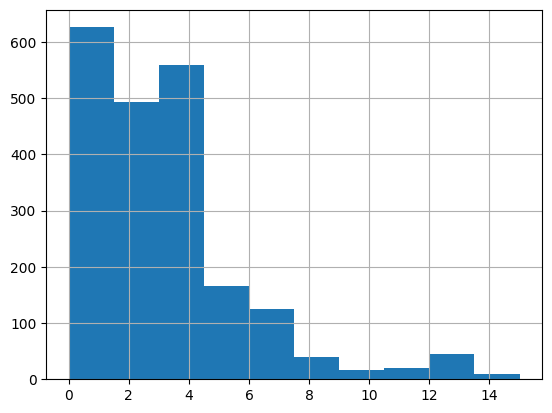

In [930]:
# data architecte missing values
df[df['Metier'] == 'data architecte']['Experience'].hist()

In [931]:
median_experience_da = df[df['Metier'] == 'data architecte']['Experience'].median()

print(median_experience_da)
df.Experience= np.where((df.Metier == "data architecte") & (df.Experience.isna()), median_experience_da,df.Experience)


2.5


# Mean number of years of Experience for each Profile

In [932]:
mean_df = df.groupby(['Metier']).agg({'Experience':'mean'}).reset_index()
mean_df

,Metier,Experience
0,data architecte,2.995054
1,data engineer,2.985087
2,data scientist,2.241268
3,lead data scientist,3.965261


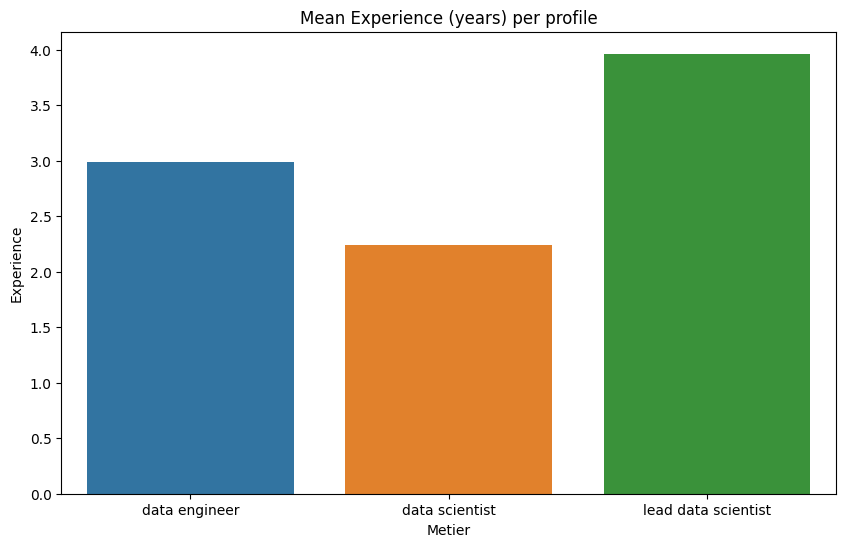

In [933]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metier', y='Experience', data=mean_df[mean_df['Metier'] != 'data architecte'])
plt.title('Mean Experience (years) per profile')
plt.show()


# EXPERIENCE Column transformation from Numerical to Categorical

For that we first categorize data into bins then we define thresholds for each Category.

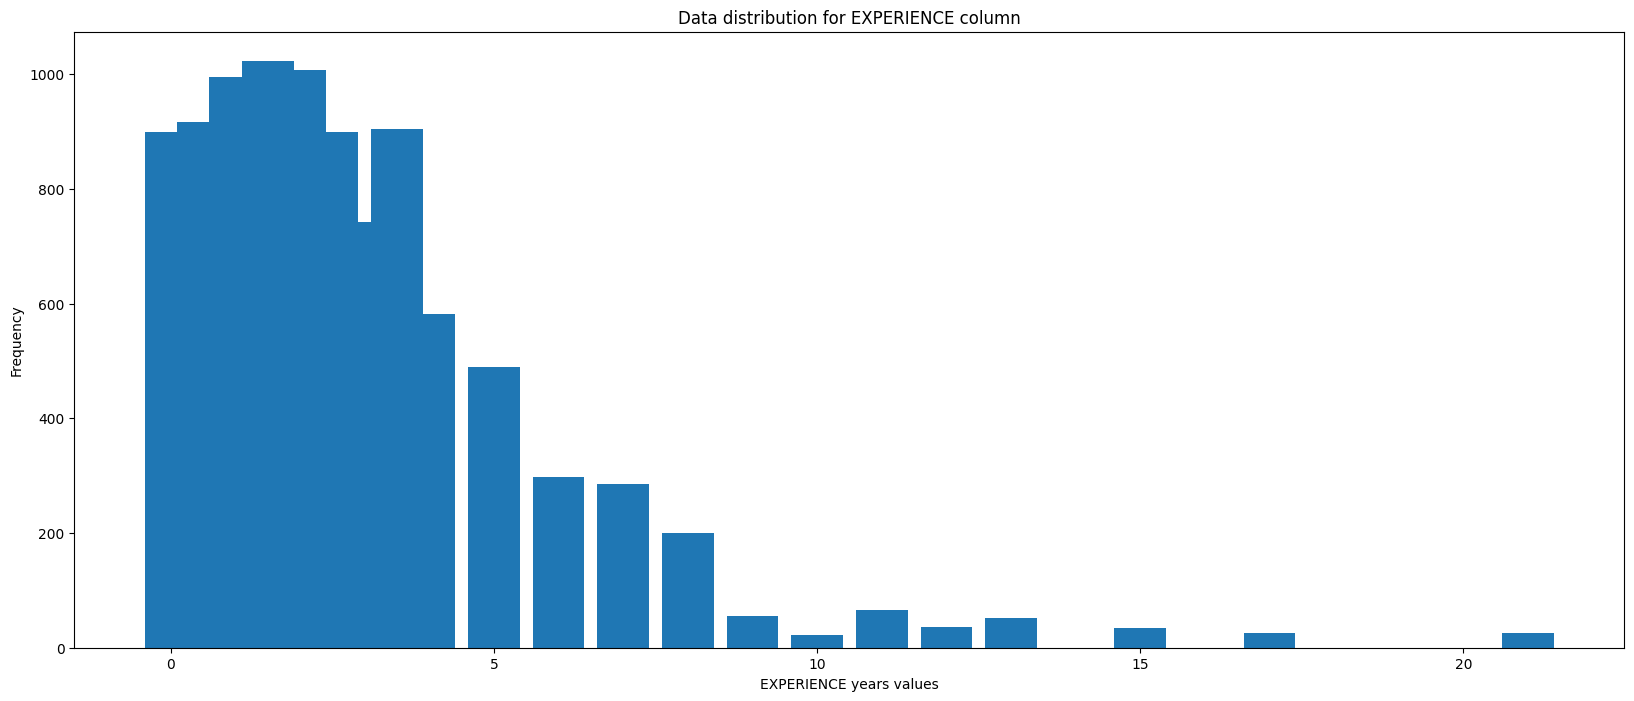

In [934]:
# Data distribution
counts = df['Experience'].value_counts()

plt.figure(figsize=(20, 8))
plt.bar(counts.index, counts.values)
plt.xlabel('EXPERIENCE years values')
plt.ylabel('Frequency')
plt.title('Data distribution for EXPERIENCE column')
plt.show()


In [935]:
categories = ['débutant', 'confirmé', 'avancé', 'expert']
bins =[-1,5,10,15,30]  ############ values defined from the graph

In [936]:
df['Exp_label'] = pd.cut(df['Experience'], bins=bins, labels=categories)

In [937]:
df.isna().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      19
Ville            0
Exp_label       19
dtype: int64

In [938]:
df.shape

(9582, 7)

**Most used Technologies**



In [939]:
df.Technologies

0           Matlab/Python/Pyspark/Scikit-learn/Tensorflow
1                               Python/Java/Scala/MongoDB
2       SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...
3                                       C/C++/Java/Python
4         Matlab/Python/C++/numpy/Tensorflow/scikit-learn
                              ...                        
9577                       C++/R/Python/Matlab/Matplotlib
9578       Excel/Python/Matlab/R/machine learning/anglais
9579                         R/machine learning/Excel/VBA
9580      Python/Pyspark/machine learning/Microsoft Azure
9581                                   VBA/Python/Excel/R
Name: Technologies, Length: 9582, dtype: object

In [940]:
dft=df.copy()
dft['Technologies'] = dft['Technologies'].str.split('/')

In [941]:
# 5 freq technologies for whole dataset
technologies_count = dft['Technologies'].copy().explode().value_counts()
top_technologies = technologies_count.reset_index().rename(columns={'index': 'Technology', 'Technologies': 'Freq'}).head(5)
top_technologies

,Technology,Freq
0,Python,6627
1,R,4374
2,SQL,2581
3,Java,1719
4,Hadoop,1589


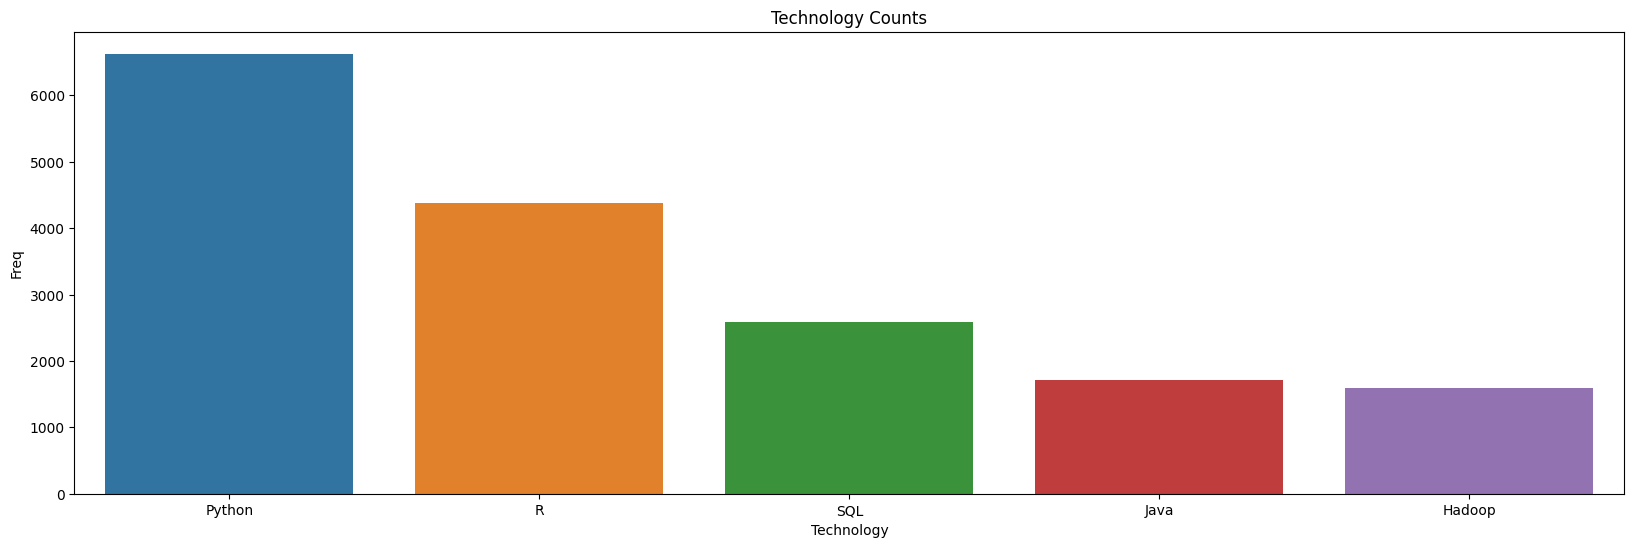

In [942]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Technology', y='Freq', data=top_technologies)
plt.xlabel('Technology')
plt.ylabel('Freq')
plt.title('Technology Counts')

plt.show()

In [943]:
# top 5 technologies for each profile
dfs = dft.copy().explode('Technologies')

top_technologies = (dfs.groupby(['Metier', 'Technologies'])
                     .size()
                     .reset_index(name='Count')
                     .sort_values(['Metier', 'Count'], ascending=[True, False])
                     .groupby('Metier')
                     .head(5))
top_technologies


,Metier,Technologies,Count
17,data architecte,Python,1025
10,data architecte,Java,662
7,data architecte,Hadoop,646
0,data architecte,AWS,618
14,data architecte,MongoDB,466
49,data engineer,Python,1181
38,data engineer,Linux,822
36,data engineer,Java,794
41,data engineer,MongoDB,596
31,data engineer,GNU,562


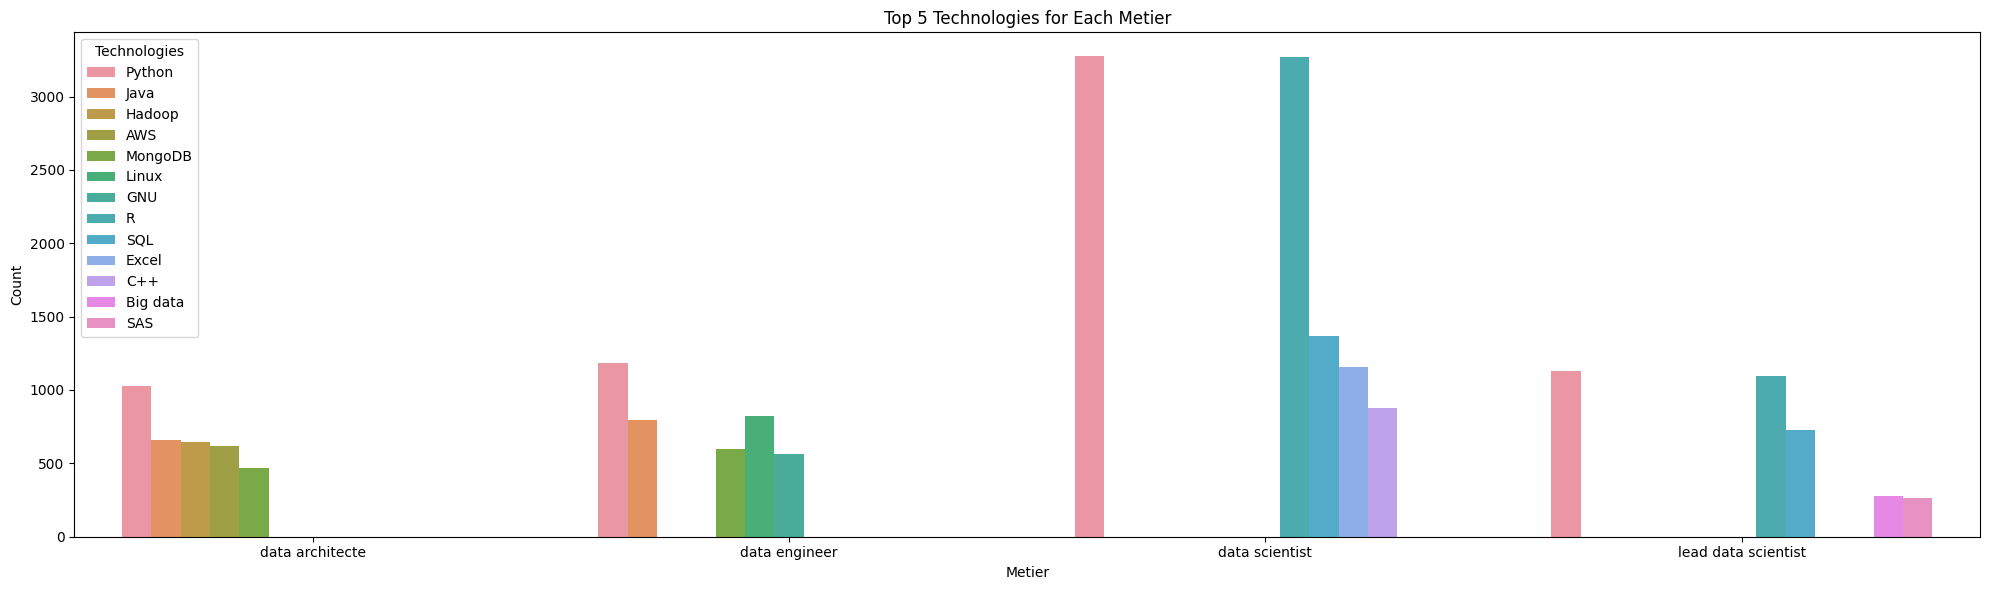

In [944]:
# Create a grouped bar chart
plt.figure(figsize=(20, 6))
sns.barplot(data=top_technologies, x="Metier", y="Count", hue="Technologies")
plt.xlabel("Metier")
plt.ylabel("Count")
plt.title("Top 5 Technologies for Each Metier")

plt.legend(title="Technologies")
plt.tight_layout()
plt.show()


# Selecting the required columns for Clustering

For clustering, we first need to define the relevant columns.


1.   First we study the correlation between columns.
2.   We split technologies column into multiple columns.





In [945]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V for categorical columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate the Cramér's V for all pairwise combinations of columns
correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Print the Cramér's V correlation matrix
print(correlation_matrix)


             Entreprise    Metier Technologies   Diplome Experience     Ville  \
Entreprise          1.0       0.0          0.0       0.0        0.0       0.0   
Metier              0.0       1.0     0.832247   0.21802   0.248569   0.02204   
Technologies        0.0  0.832247          1.0  0.207949   0.061789  0.020361   
Diplome             0.0   0.21802     0.207949       1.0   0.056208       0.0   
Experience          0.0  0.248569     0.061789  0.056208        1.0  0.012149   
Ville               0.0   0.02204     0.020361       0.0   0.012149       1.0   
Exp_label      0.041515  0.099957     0.066636  0.024341    0.99911  0.009048   

             Exp_label  
Entreprise    0.041515  
Metier        0.099957  
Technologies  0.066636  
Diplome       0.024341  
Experience     0.99911  
Ville         0.009048  
Exp_label          1.0  


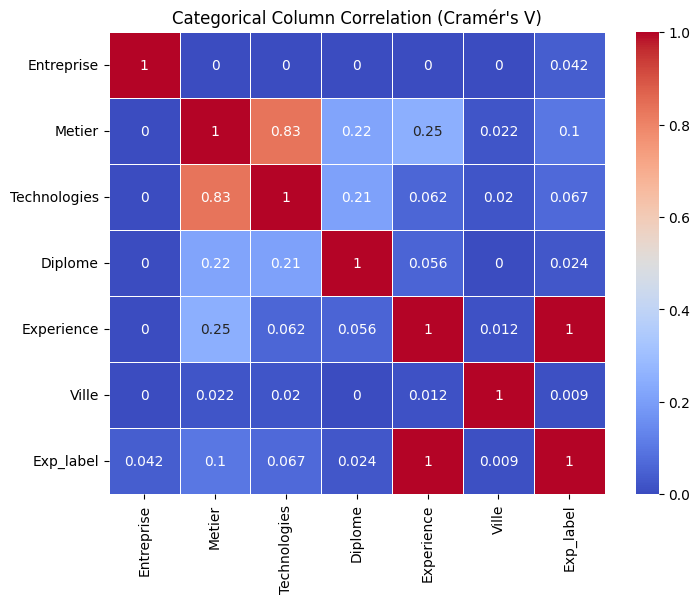

In [946]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Categorical Column Correlation (Cramér's V)")
plt.show()

We can clearly see that ville and entreprise are not relevant columns since the correlation is low with other columns.

In [947]:
df_categories =  df.copy()
df_categories['tech'] = df_categories['Technologies'].str.split("/")


def sorting(tech):
    lower_tech = [element.lower() for element in tech]
#     lower_tech = lower_tech[:5]
    sorted_lower_tech = sorted(lower_tech)

    return sorted_lower_tech



df_categories['tech'] = df_categories.apply(lambda row: sorting(row['tech']), axis=1)
df_categories['tech_concat'] = df_categories['tech'].agg(lambda x: '_'.join(map(str, x)))
df_categories

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,tech,tech_concat
0,Sanofi,data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,"[matlab, pyspark, python, scikit-learn, tensor...",matlab_pyspark_python_scikit-learn_tensorflow
1,Massachusetts General Hospital(MGH),data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,débutant,"[java, mongodb, python, scala]",java_mongodb_python_scala
2,Delve,lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,débutant,"[python, r, scikit-learn, spss, sql, tensorflo...",python_r_scikit-learn_spss_sql_tensorflow_tera...
3,Ann & Robert H. Lurie Children’s Hospital of C...,data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant,"[c, c++, java, python]",c_c++_java_python
4,Arm,data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,débutant,"[c++, matlab, numpy, python, scikit-learn, ten...",c++_matlab_numpy_python_scikit-learn_tensorflow
...,...,...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,débutant,"[c++, matlab, matplotlib, python, r]",c++_matlab_matplotlib_python_r
9578,Charles River Analytics,data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,avancé,"[anglais, excel, machine learning, matlab, pyt...",anglais_excel_machine learning_matlab_python_r
9579,Ball Aerospace,data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,débutant,"[excel, machine learning, r, vba]",excel_machine learning_r_vba
9580,Takeda Pharmaceutical,data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert,"[machine learning, microsoft azure, pyspark, p...",machine learning_microsoft azure_pyspark_python


In [948]:
df_categories

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,tech,tech_concat
0,Sanofi,data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,"[matlab, pyspark, python, scikit-learn, tensor...",matlab_pyspark_python_scikit-learn_tensorflow
1,Massachusetts General Hospital(MGH),data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,débutant,"[java, mongodb, python, scala]",java_mongodb_python_scala
2,Delve,lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,débutant,"[python, r, scikit-learn, spss, sql, tensorflo...",python_r_scikit-learn_spss_sql_tensorflow_tera...
3,Ann & Robert H. Lurie Children’s Hospital of C...,data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant,"[c, c++, java, python]",c_c++_java_python
4,Arm,data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,débutant,"[c++, matlab, numpy, python, scikit-learn, ten...",c++_matlab_numpy_python_scikit-learn_tensorflow
...,...,...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,débutant,"[c++, matlab, matplotlib, python, r]",c++_matlab_matplotlib_python_r
9578,Charles River Analytics,data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,avancé,"[anglais, excel, machine learning, matlab, pyt...",anglais_excel_machine learning_matlab_python_r
9579,Ball Aerospace,data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,débutant,"[excel, machine learning, r, vba]",excel_machine learning_r_vba
9580,Takeda Pharmaceutical,data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,expert,"[machine learning, microsoft azure, pyspark, p...",machine learning_microsoft azure_pyspark_python


Now we deal with column 'Technologies'

In [949]:
df1 = df.copy()
df1 =  df1.drop('Technologies', axis=1).join(df1['Technologies'].str.get_dummies('/'))
df1.head(2)

,Entreprise,Metier,Diplome,Experience,Ville,Exp_label,AI,AWS,Anglais,Big data,...,Tensorflow,Teradata,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn
0,Sanofi,data scientist,Master,1.0,Paris,débutant,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Massachusetts General Hospital(MGH),data architecte,Master,3.0,Marseille,débutant,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [950]:
df1.columns

Index(['Entreprise', 'Metier', 'Diplome', 'Experience', 'Ville', 'Exp_label',
       'AI', 'AWS', 'Anglais', 'Big data', 'C', 'C++', 'Cassandra',
       'Deep learning', 'Docker', 'Elasticsearch', 'Excel', 'GNU', 'HBASE',
       'HDFS', 'Hadoop', 'Hadoop(HDFS)', 'Hive', 'Java', 'Kafka', 'Kibana',
       'Linux', 'Machine learning', 'Map-Reduce', 'MariaDB', 'Matlab',
       'Matplotlib', 'Microsoft Azure', 'MongoDB', 'MySQL', 'NoSQ', 'NoSQL',
       'ORACLE', 'PIG', 'Perl', 'PostgreSQL', 'PySpark', 'Pycharm', 'Pyspark',
       'Python', 'R', 'Redshift', 'Ruby', 'SAS', 'SPSS', 'SQL', 'Scala',
       'Scikit-learn', 'Scoring', 'Spark', 'Tableau', 'Tensorflow', 'Teradata',
       'VBA', 'Vertica', 'Windows', 'Yarn', 'anglais', 'machine learning',
       'numpy', 'scikit-learn'],
      dtype='object')

In [951]:
# selecting relevant columns for clustering
df_train = df1.drop(columns=['Experience','Entreprise','Ville'])#.dropna()
df_train_without_metier = df_train.drop(columns='Metier')

df_train

,Metier,Diplome,Exp_label,AI,AWS,Anglais,Big data,C,C++,Cassandra,...,Tensorflow,Teradata,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn
0,data scientist,Master,débutant,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,data architecte,Master,débutant,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lead data scientist,Master,débutant,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,data scientist,Master,débutant,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,data scientist,Phd,débutant,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,data scientist,Master,débutant,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9578,data scientist,Master,avancé,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9579,data scientist,Master,débutant,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9580,data scientist,Master,expert,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [952]:
df_test = df_train[df_train['Metier'].isna()] # these are observations that has no Metier defined, so we will keep them for test in prediction part at the end.
df_train = df_train[df_train['Metier'].notna()]
print(df_train.shape, df_test.shape)

(9563, 63) (19, 63)


We now tranform the dataset to numerical, because it's easier and less complex to understand for the model. This choice was motivated by the complexiness of technologies column.

In [953]:
# encoding to numerical
# # Encode copy of dataset to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# # Apply label encoding to the 'Profession' column
df_train['Diplome_category'] = label_encoder.fit_transform(df_train['Diplome'])

df_train['Experience_category'] = label_encoder.fit_transform(df_train['Exp_label'])
df_train['Metier_category'] = label_encoder.fit_transform(df_train['Metier'])

<ipython-input-953-2d5d3d6faf45>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Diplome_category'] = label_encoder.fit_transform(df_train['Diplome'])
<ipython-input-953-2d5d3d6faf45>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Experience_category'] = label_encoder.fit_transform(df_train['Exp_label'])
<ipython-input-953-2d5d3d6faf45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [954]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Elbow curve to find optimal K

This method is commonly used to find optimal number of clusters, it is quick and intuitive.

In [955]:
df_train = df_train.drop(columns=['Diplome','Exp_label','Metier','Metier_category'])

In [956]:
df_train

,AI,AWS,Anglais,Big data,C,C++,Cassandra,Deep learning,Docker,Elasticsearch,...,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn,Diplome_category,Experience_category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
9578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
9579,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,2
9580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

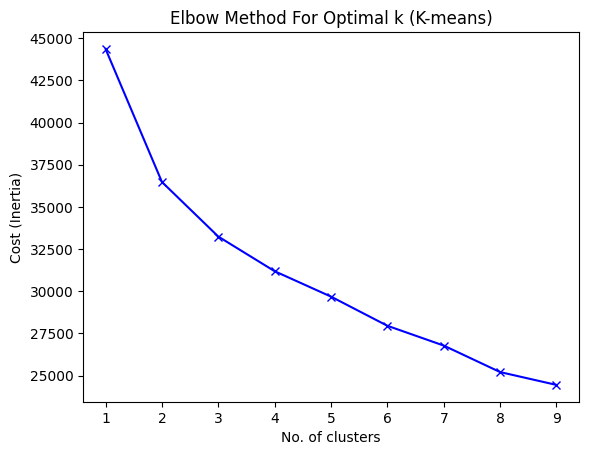

In [957]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Initialize an empty list to store cost values
cost = []

# Define the range of cluster numbers you want to try
K = range(1, 10)

# Iterate through different cluster numbers
for num_clusters in list(K):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_train)
    cost.append(kmeans.inertia_)  # Inertia is the cost metric for K-means

# Plot the cost against the number of clusters
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method For Optimal k (K-means)')
plt.show()

**We can see that optimal_k = 3**

To confirm that the number of clusters is appropriate, we can use further methods to prove it. Let's use common method 'silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

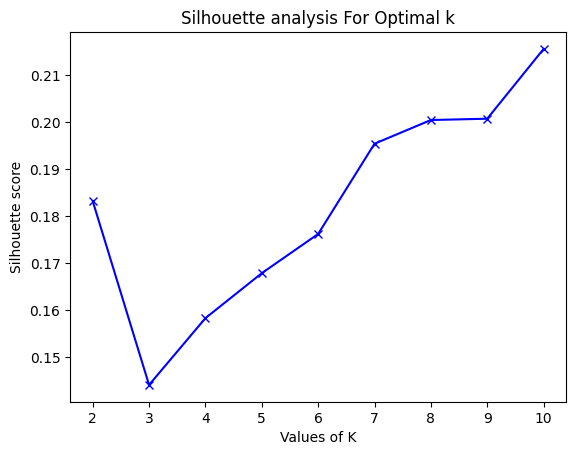

In [958]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_train)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(df_train, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

so 3 is the optimal number for k.

# Now building the model depending on the no. of clusters we are getting from the elbow method

In [959]:
from sklearn.cluster import KMeans
optimal_k=3

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_model.fit(df_train)

cluster_labels = kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [960]:
# model evaluation
from sklearn import datasets
from sklearn.cluster import KMeans

score = silhouette_score(df_train, kmeans_model.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.144


A Silhouette Score is a measure of the quality of the clustering results.

The score (0.135) is positive, which indicates that, on average, data points within clusters are more similar to each other than to data points in neighbors clusters.
The score of 0.205 is low which means that the degree of separation between clusters may not be very high. So the clusters are not well-separated and clusters are overlapping.







# Seeing the distribution of different metier after clustering

In [961]:
df_train['Metier'] = df.Metier

In [962]:
df_train.insert(0, "Cluster", cluster_labels)

In [963]:
temp = df_train.groupby(['Cluster','Metier']).size().reset_index().rename(columns= {0:'count'})
# temp.columns
temp['percentage_contribution'] = temp['count']*100/temp.groupby('Cluster')['count'].transform('sum')
temp

,Cluster,Metier,count,percentage_contribution
0,0,data scientist,2003,70.528169
1,0,lead data scientist,837,29.471831
2,1,data architecte,1896,43.317341
3,1,data engineer,2048,46.790039
4,1,data scientist,339,7.745031
5,1,lead data scientist,94,2.147590
6,2,data architecte,227,9.676044
7,2,data engineer,299,12.745098
8,2,data scientist,1523,64.919011
9,2,lead data scientist,297,12.659847


* Cluster 0 : data scientists (Metier 2: data scientist, 3: lead data scientist )
* Cluster 1 : data architecte + engineers (Metier 0: data architecte, 1: data engineer)
* Cluster 2 : data scientists (Metier 2: data scientist, 3: lead data scientist )

In [964]:
df_train=df_train.drop(columns='Cluster')

## **Improvement**

Let's try using catefories instead of numerical values

In [965]:
df_categories = df_categories.drop(columns=['Entreprise','Technologies','tech','Ville','Experience'])
df_categories

,Metier,Diplome,Exp_label,tech_concat
0,data scientist,Master,débutant,matlab_pyspark_python_scikit-learn_tensorflow
1,data architecte,Master,débutant,java_mongodb_python_scala
2,lead data scientist,Master,débutant,python_r_scikit-learn_spss_sql_tensorflow_tera...
3,data scientist,Master,débutant,c_c++_java_python
4,data scientist,Phd,débutant,c++_matlab_numpy_python_scikit-learn_tensorflow
...,...,...,...,...
9577,data scientist,Master,débutant,c++_matlab_matplotlib_python_r
9578,data scientist,Master,avancé,anglais_excel_machine learning_matlab_python_r
9579,data scientist,Master,débutant,excel_machine learning_r_vba
9580,data scientist,Master,expert,machine learning_microsoft azure_pyspark_python


In [966]:
df_categories = df_categories.drop(columns='Metier') # to drop data with no metier

In [967]:
df_categories=df_categories.dropna()

In [968]:
from kmodes.kmodes import KModes

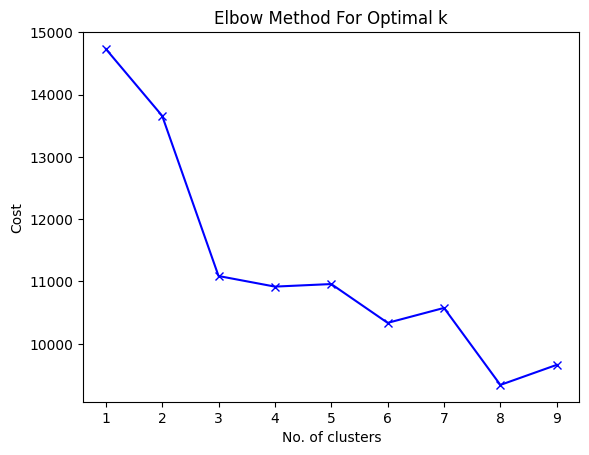

In [969]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5)
    kmode.fit_predict(df_categories)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal k = 5

In [970]:
df_categories

,Diplome,Exp_label,tech_concat
0,Master,débutant,matlab_pyspark_python_scikit-learn_tensorflow
1,Master,débutant,java_mongodb_python_scala
2,Master,débutant,python_r_scikit-learn_spss_sql_tensorflow_tera...
3,Master,débutant,c_c++_java_python
4,Phd,débutant,c++_matlab_numpy_python_scikit-learn_tensorflow
...,...,...,...
9577,Master,débutant,c++_matlab_matplotlib_python_r
9578,Master,avancé,anglais_excel_machine learning_matlab_python_r
9579,Master,débutant,excel_machine learning_r_vba
9580,Master,expert,machine learning_microsoft azure_pyspark_python


# training kmodes model with optimal k

In [971]:
# now building kmodes with optimal k
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_categories)
clusters

df_categories.insert(0, "Cluster", clusters)
df_categories


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 606, cost: 11592.0
Run 1, iteration: 2/100, moves: 44, cost: 11592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4616, cost: 10709.0
Run 2, iteration: 2/100, moves: 130, cost: 10709.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 96, cost: 12185.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1046, cost: 9886.0
Run 4, iteration: 2/100, moves: 5, cost: 9886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 483, cost: 11541.0
Best run was number 4


,Cluster,Diplome,Exp_label,tech_concat
0,1,Master,débutant,matlab_pyspark_python_scikit-learn_tensorflow
1,1,Master,débutant,java_mongodb_python_scala
2,1,Master,débutant,python_r_scikit-learn_spss_sql_tensorflow_tera...
3,1,Master,débutant,c_c++_java_python
4,3,Phd,débutant,c++_matlab_numpy_python_scikit-learn_tensorflow
...,...,...,...,...
9577,1,Master,débutant,c++_matlab_matplotlib_python_r
9578,1,Master,avancé,anglais_excel_machine learning_matlab_python_r
9579,1,Master,débutant,excel_machine learning_r_vba
9580,1,Master,expert,machine learning_microsoft azure_pyspark_python


In [972]:
df_categories['Metier'] = df['Metier'].copy().dropna()

In [973]:
temp = df_categories.groupby(['Cluster','Metier']).size().reset_index().rename(columns= {0:'count'})
# temp.columns
temp['percentage_contribution'] = temp['count']*100/temp.groupby('Cluster')['count'].transform('sum')
temp

,Cluster,Metier,count,percentage_contribution
0,0,data architecte,426,30.472103
1,0,data engineer,326,23.319027
2,0,data scientist,446,31.902718
3,0,lead data scientist,200,14.306152
4,1,data architecte,1063,21.509510
5,1,data engineer,1270,25.698098
6,1,data scientist,1895,38.344800
7,1,lead data scientist,714,14.447592
8,2,data architecte,63,17.073171
9,2,data engineer,131,35.501355


In [974]:
df_categories=df_categories.drop(columns='Cluster')

# Missing Metier prediction

In [975]:
df1.head(2)

,Entreprise,Metier,Diplome,Experience,Ville,Exp_label,AI,AWS,Anglais,Big data,...,Tensorflow,Teradata,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn
0,Sanofi,data scientist,Master,1.0,Paris,débutant,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Massachusetts General Hospital(MGH),data architecte,Master,3.0,Marseille,débutant,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [976]:
print(df_train.shape, df_test.shape)

(9563, 63) (19, 63)


In [977]:
df_train.head(2)

,AI,AWS,Anglais,Big data,C,C++,Cassandra,Deep learning,Docker,Elasticsearch,...,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn,Diplome_category,Experience_category,Metier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data architecte


In [978]:
df_test.head(2) # data with missing Metier values

,Metier,Diplome,Exp_label,AI,AWS,Anglais,Big data,C,C++,Cassandra,...,Tensorflow,Teradata,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn
346,NaN,No diploma,débutant,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2058,NaN,Master,avancé,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [979]:
df_train.columns

Index(['AI', 'AWS', 'Anglais', 'Big data', 'C', 'C++', 'Cassandra',
       'Deep learning', 'Docker', 'Elasticsearch', 'Excel', 'GNU', 'HBASE',
       'HDFS', 'Hadoop', 'Hadoop(HDFS)', 'Hive', 'Java', 'Kafka', 'Kibana',
       'Linux', 'Machine learning', 'Map-Reduce', 'MariaDB', 'Matlab',
       'Matplotlib', 'Microsoft Azure', 'MongoDB', 'MySQL', 'NoSQ', 'NoSQL',
       'ORACLE', 'PIG', 'Perl', 'PostgreSQL', 'PySpark', 'Pycharm', 'Pyspark',
       'Python', 'R', 'Redshift', 'Ruby', 'SAS', 'SPSS', 'SQL', 'Scala',
       'Scikit-learn', 'Scoring', 'Spark', 'Tableau', 'Tensorflow', 'Teradata',
       'VBA', 'Vertica', 'Windows', 'Yarn', 'anglais', 'machine learning',
       'numpy', 'scikit-learn', 'Diplome_category', 'Experience_category',
       'Metier'],
      dtype='object')

In [980]:
df_test.columns

Index(['Metier', 'Diplome', 'Exp_label', 'AI', 'AWS', 'Anglais', 'Big data',
       'C', 'C++', 'Cassandra', 'Deep learning', 'Docker', 'Elasticsearch',
       'Excel', 'GNU', 'HBASE', 'HDFS', 'Hadoop', 'Hadoop(HDFS)', 'Hive',
       'Java', 'Kafka', 'Kibana', 'Linux', 'Machine learning', 'Map-Reduce',
       'MariaDB', 'Matlab', 'Matplotlib', 'Microsoft Azure', 'MongoDB',
       'MySQL', 'NoSQ', 'NoSQL', 'ORACLE', 'PIG', 'Perl', 'PostgreSQL',
       'PySpark', 'Pycharm', 'Pyspark', 'Python', 'R', 'Redshift', 'Ruby',
       'SAS', 'SPSS', 'SQL', 'Scala', 'Scikit-learn', 'Scoring', 'Spark',
       'Tableau', 'Tensorflow', 'Teradata', 'VBA', 'Vertica', 'Windows',
       'Yarn', 'anglais', 'machine learning', 'numpy', 'scikit-learn'],
      dtype='object')

In [981]:
# encoding test data
label_encoder = LabelEncoder()

# # Apply label encoding to the 'Profession' column
df_test['Diplome_category'] = label_encoder.fit_transform(df_test['Diplome'])

df_test['Experience_category'] = label_encoder.fit_transform(df_test['Exp_label'])

<ipython-input-981-2468e65a88dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Diplome_category'] = label_encoder.fit_transform(df_test['Diplome'])
<ipython-input-981-2468e65a88dc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Experience_category'] = label_encoder.fit_transform(df_test['Exp_label'])


In [982]:
df_test = df_test.drop(columns=['Diplome','Exp_label','Metier'])

In [983]:
df_test.columns

Index(['AI', 'AWS', 'Anglais', 'Big data', 'C', 'C++', 'Cassandra',
       'Deep learning', 'Docker', 'Elasticsearch', 'Excel', 'GNU', 'HBASE',
       'HDFS', 'Hadoop', 'Hadoop(HDFS)', 'Hive', 'Java', 'Kafka', 'Kibana',
       'Linux', 'Machine learning', 'Map-Reduce', 'MariaDB', 'Matlab',
       'Matplotlib', 'Microsoft Azure', 'MongoDB', 'MySQL', 'NoSQ', 'NoSQL',
       'ORACLE', 'PIG', 'Perl', 'PostgreSQL', 'PySpark', 'Pycharm', 'Pyspark',
       'Python', 'R', 'Redshift', 'Ruby', 'SAS', 'SPSS', 'SQL', 'Scala',
       'Scikit-learn', 'Scoring', 'Spark', 'Tableau', 'Tensorflow', 'Teradata',
       'VBA', 'Vertica', 'Windows', 'Yarn', 'anglais', 'machine learning',
       'numpy', 'scikit-learn', 'Diplome_category', 'Experience_category'],
      dtype='object')

Split data for train and validation

In [984]:
df_train

,AI,AWS,Anglais,Big data,C,C++,Cassandra,Deep learning,Docker,Elasticsearch,...,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn,Diplome_category,Experience_category,Metier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data architecte
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,lead data scientist
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,3,2,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
9578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,data scientist
9579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2,data scientist
9580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,3,data scientist


In [985]:
df_train

,AI,AWS,Anglais,Big data,C,C++,Cassandra,Deep learning,Docker,Elasticsearch,...,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn,Diplome_category,Experience_category,Metier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data architecte
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,lead data scientist
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,3,2,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2,data scientist
9578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,data scientist
9579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2,data scientist
9580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,3,data scientist


In [986]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
df_train['Metier_category'] = label_encoder.fit_transform(df_train['Metier'])
y = df_train['Metier_category']

X = df_train.drop(['Metier','Metier_category'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [987]:
X

,AI,AWS,Anglais,Big data,C,C++,Cassandra,Deep learning,Docker,Elasticsearch,...,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn,Diplome_category,Experience_category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
9578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
9579,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,2
9580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3


# ML models used here are just for test purposes. The three models handle well multiclassification but there adaptability depends on the data.

logistic regression - random forest - xgboost

# First model is logistic regression.

*   simple, made for  multiclassification, good when data is linear



In [988]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [989]:
_predictions = multi_model.predict(X_test)
print('Predicted labels: ', _predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [1 1 2 2 2 2 0 0 2 1 2 2 1 1 2]
Actual labels   :  9019    1
5035    1
1143    2
1356    2
8755    3
1433    2
1771    0
3470    0
4004    2
4946    1
6249    2
5348    2
1057    1
7757    1
4783    2
Name: Metier_category, dtype: int64


In [990]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix


In [991]:
classification_report(y_test, _predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       416\n           1       1.00      1.00      1.00       494\n           2       0.80      0.94      0.87       784\n           3       0.54      0.20      0.29       219\n\n    accuracy                           0.88      1913\n   macro avg       0.83      0.78      0.78      1913\nweighted avg       0.86      0.88      0.86      1913\n'

In [992]:

print("Overall Accuracy:",accuracy_score(y_test, _predictions))
print("Overall Precision:",precision_score(y_test, _predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, _predictions, average='macro'))

Overall Accuracy: 0.8797699947726084
Overall Precision: 0.8271447987854106
Overall Recall: 0.780739034286001


In [993]:
mcm = confusion_matrix(y_test, _predictions)
mcm

array([[412,   0,   4,   0],
       [  0, 494,   0,   0],
       [ 13,   0, 734,  37],
       [  1,   0, 175,  43]])

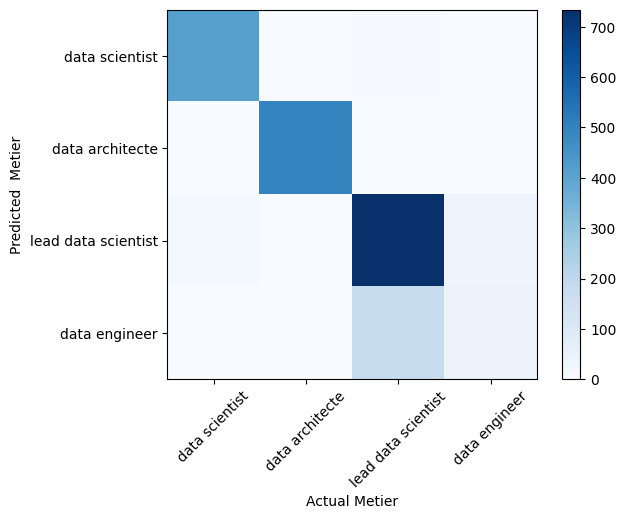

In [994]:
_classes = ['data scientist', 'data architecte', 'lead data scientist',
       'data engineer']

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(_classes))
plt.xticks(tick_marks, _classes, rotation=45)
plt.yticks(tick_marks, _classes)
plt.xlabel("Actual Metier")
plt.ylabel("Predicted  Metier")
plt.show()

**Now since accuracy is good lets predict Metier where its value is nan**

In [995]:
test_predictions = multi_model.predict(df_test)
test_predictions

array([1, 3, 2, 2, 0, 2, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2])

In [996]:
 # 0 : data architecte, 1: data engineer,  2: data scientist, 3: lead data scientist
 # Define a dictionary to map integers to labels
label_mapping = {
    0: 'data architecte',
    1: 'data engineer',
    2: 'data scientist',
    3: 'lead data scientist'
}

# Map the integers to labels using a list comprehension
labels = [label_mapping[i] for i in new_predictions]

# Print the resulting list of labels
labels


['data engineer',
 'data scientist',
 'data scientist',
 'data scientist',
 'data architecte',
 'data scientist',
 'data scientist',
 'lead data scientist',
 'data engineer',
 'data scientist',
 'data architecte',
 'data engineer',
 'data architecte',
 'data scientist',
 'data engineer',
 'data scientist',
 'data architecte',
 'data scientist',
 'data scientist']

In [997]:
df_test['Metier']=labels
df_test['Metier']

346           data engineer
2058         data scientist
2670         data scientist
2899         data scientist
3346        data architecte
4248         data scientist
4290         data scientist
4292    lead data scientist
5425          data engineer
5593         data scientist
5712        data architecte
6024          data engineer
6625        data architecte
7091         data scientist
7228          data engineer
7330         data scientist
9087        data architecte
9427         data scientist
9490         data scientist
Name: Metier, dtype: object

# Random Forest

*  robust, avoid overfitting, nonlinear relationships



In [998]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [999]:
df_test.columns

Index(['AI', 'AWS', 'Anglais', 'Big data', 'C', 'C++', 'Cassandra',
       'Deep learning', 'Docker', 'Elasticsearch', 'Excel', 'GNU', 'HBASE',
       'HDFS', 'Hadoop', 'Hadoop(HDFS)', 'Hive', 'Java', 'Kafka', 'Kibana',
       'Linux', 'Machine learning', 'Map-Reduce', 'MariaDB', 'Matlab',
       'Matplotlib', 'Microsoft Azure', 'MongoDB', 'MySQL', 'NoSQ', 'NoSQL',
       'ORACLE', 'PIG', 'Perl', 'PostgreSQL', 'PySpark', 'Pycharm', 'Pyspark',
       'Python', 'R', 'Redshift', 'Ruby', 'SAS', 'SPSS', 'SQL', 'Scala',
       'Scikit-learn', 'Scoring', 'Spark', 'Tableau', 'Tensorflow', 'Teradata',
       'VBA', 'Vertica', 'Windows', 'Yarn', 'anglais', 'machine learning',
       'numpy', 'scikit-learn', 'Diplome_category', 'Experience_category',
       'Metier'],
      dtype='object')

In [1000]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report)
print('Confusion Matrix:\n', confusion_matrix)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       416
           1       1.00      1.00      1.00       494
           2       0.81      0.96      0.88       784
           3       0.68      0.20      0.31       219

    accuracy                           0.89      1913
   macro avg       0.86      0.79      0.79      1913
weighted avg       0.88      0.89      0.87      1913

Confusion Matrix:
 [[412   0   4   0]
 [  0 494   0   0]
 [ 11   0 752  21]
 [  1   0 174  44]]


In [1004]:
df_test = df_test.drop(columns='Metier')

In [1005]:
df_test.head(2)

,AI,AWS,Anglais,Big data,C,C++,Cassandra,Deep learning,Docker,Elasticsearch,...,VBA,Vertica,Windows,Yarn,anglais,machine learning,numpy,scikit-learn,Diplome_category,Experience_category
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
2058,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [1006]:
new_predictions = rf_classifier.predict(df_test)
new_predictions

array([1, 2, 2, 2, 0, 2, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2])

In [1007]:
 # 0 : data architecte, 1: data engineer,  2: data scientist, 3: lead data scientist
 # Define a dictionary to map integers to labels
label_mapping = {
    0: 'data architecte',
    1: 'data engineer',
    2: 'data scientist',
    3: 'lead data scientist'
}

# Map the integers to labels using a list comprehension
labels = [label_mapping[i] for i in new_predictions]

# Print the resulting list of labels
labels


['data engineer',
 'data scientist',
 'data scientist',
 'data scientist',
 'data architecte',
 'data scientist',
 'data scientist',
 'lead data scientist',
 'data engineer',
 'data scientist',
 'data architecte',
 'data engineer',
 'data architecte',
 'data scientist',
 'data engineer',
 'data scientist',
 'data architecte',
 'data scientist',
 'data scientist']

In [1008]:
df_test['Metier']=labels
df_test['Metier']

346           data engineer
2058         data scientist
2670         data scientist
2899         data scientist
3346        data architecte
4248         data scientist
4290         data scientist
4292    lead data scientist
5425          data engineer
5593         data scientist
5712        data architecte
6024          data engineer
6625        data architecte
7091         data scientist
7228          data engineer
7330         data scientist
9087        data architecte
9427         data scientist
9490         data scientist
Name: Metier, dtype: object

# XGBOOST

In [1009]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1010]:
# Create an XGBoost classifier with optional hyperparameters
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=optimal_k,     # Number of classes in your dataset
    max_depth=3,               # Maximum tree depth (you can tune this)
    learning_rate=0.1,         # Learning rate (you can tune this)
    n_estimators=100           # Number of boosting rounds (you can tune this)
)

model=xgb_classifier.fit(X_train, y_train)

In [1011]:
y_pred = xgb_classifier.predict(X_test)

In [1012]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_str)
print('Confusion Matrix:\n', confusion_mat)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       416
           1       1.00      1.00      1.00       494
           2       0.80      0.98      0.88       784
           3       0.73      0.19      0.30       219

    accuracy                           0.89      1913
   macro avg       0.88      0.78      0.79      1913
weighted avg       0.89      0.89      0.86      1913

Confusion Matrix:
 [[397   0  19   0]
 [  0 494   0   0]
 [  0   0 769  15]
 [  0   0 178  41]]


In [1013]:


# Make predictions on the new data
predictions = xgb_classifier.predict(df_test.drop(columns=['Metier']))
predictions

array([1, 2, 2, 2, 0, 2, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2],
      dtype=int32)

In [1014]:
 # 0 : data architecte, 1: data engineer,  2: data scientist, 3: lead data scientist
 # Define a dictionary to map integers to labels
label_mapping = {
    0: 'data architecte',
    1: 'data engineer',
    2: 'data scientist',
    3: 'lead data scientist'
}

# Given array
array_of_integers = [1, 3, 2, 2, 0, 2, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2]

# Map the integers to labels using a list comprehension
labels = [label_mapping[i] for i in array_of_integers]

# Print the resulting list of labels
print(labels)


['data engineer', 'lead data scientist', 'data scientist', 'data scientist', 'data architecte', 'data scientist', 'data scientist', 'lead data scientist', 'data engineer', 'data scientist', 'data architecte', 'data engineer', 'data architecte', 'data scientist', 'data engineer', 'data scientist', 'data architecte', 'data scientist', 'data scientist']


In [1015]:
df_test['Metier'] = labels
df_test['Metier']

346           data engineer
2058    lead data scientist
2670         data scientist
2899         data scientist
3346        data architecte
4248         data scientist
4290         data scientist
4292    lead data scientist
5425          data engineer
5593         data scientist
5712        data architecte
6024          data engineer
6625        data architecte
7091         data scientist
7228          data engineer
7330         data scientist
9087        data architecte
9427         data scientist
9490         data scientist
Name: Metier, dtype: object